Необходимо провести чистку/восстановление признаков и отдельных экземпляров.  
Использовать тепловую матрицу для удаления сильно зависимых признаков, найти и выбрать наиболее важные для настройки модели признаки посредством алгоритма Gain Ratio (коэффициент усиления) из алгоритма классификации с помощью деревьев решений C4.5. Рассказать о проделанной работе и обосновать каждое преобразование датасета. За основу берём датасет с данными о ценах на лаптопы.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Laptop_price.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [4]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [5]:
num_cols = df.select_dtypes([np.number]).columns

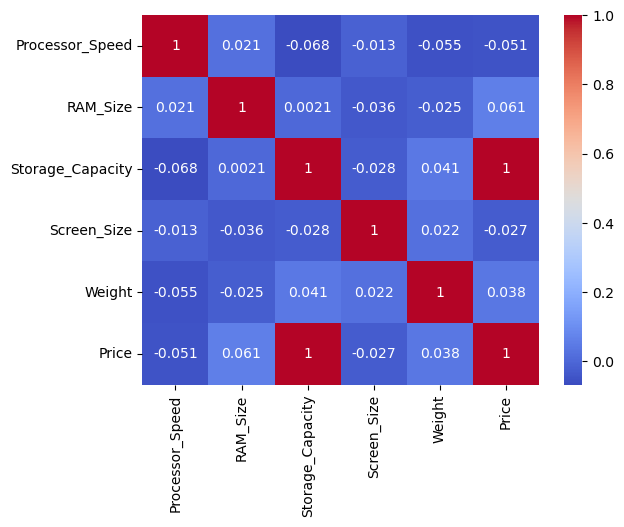

In [6]:
# Create a correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()


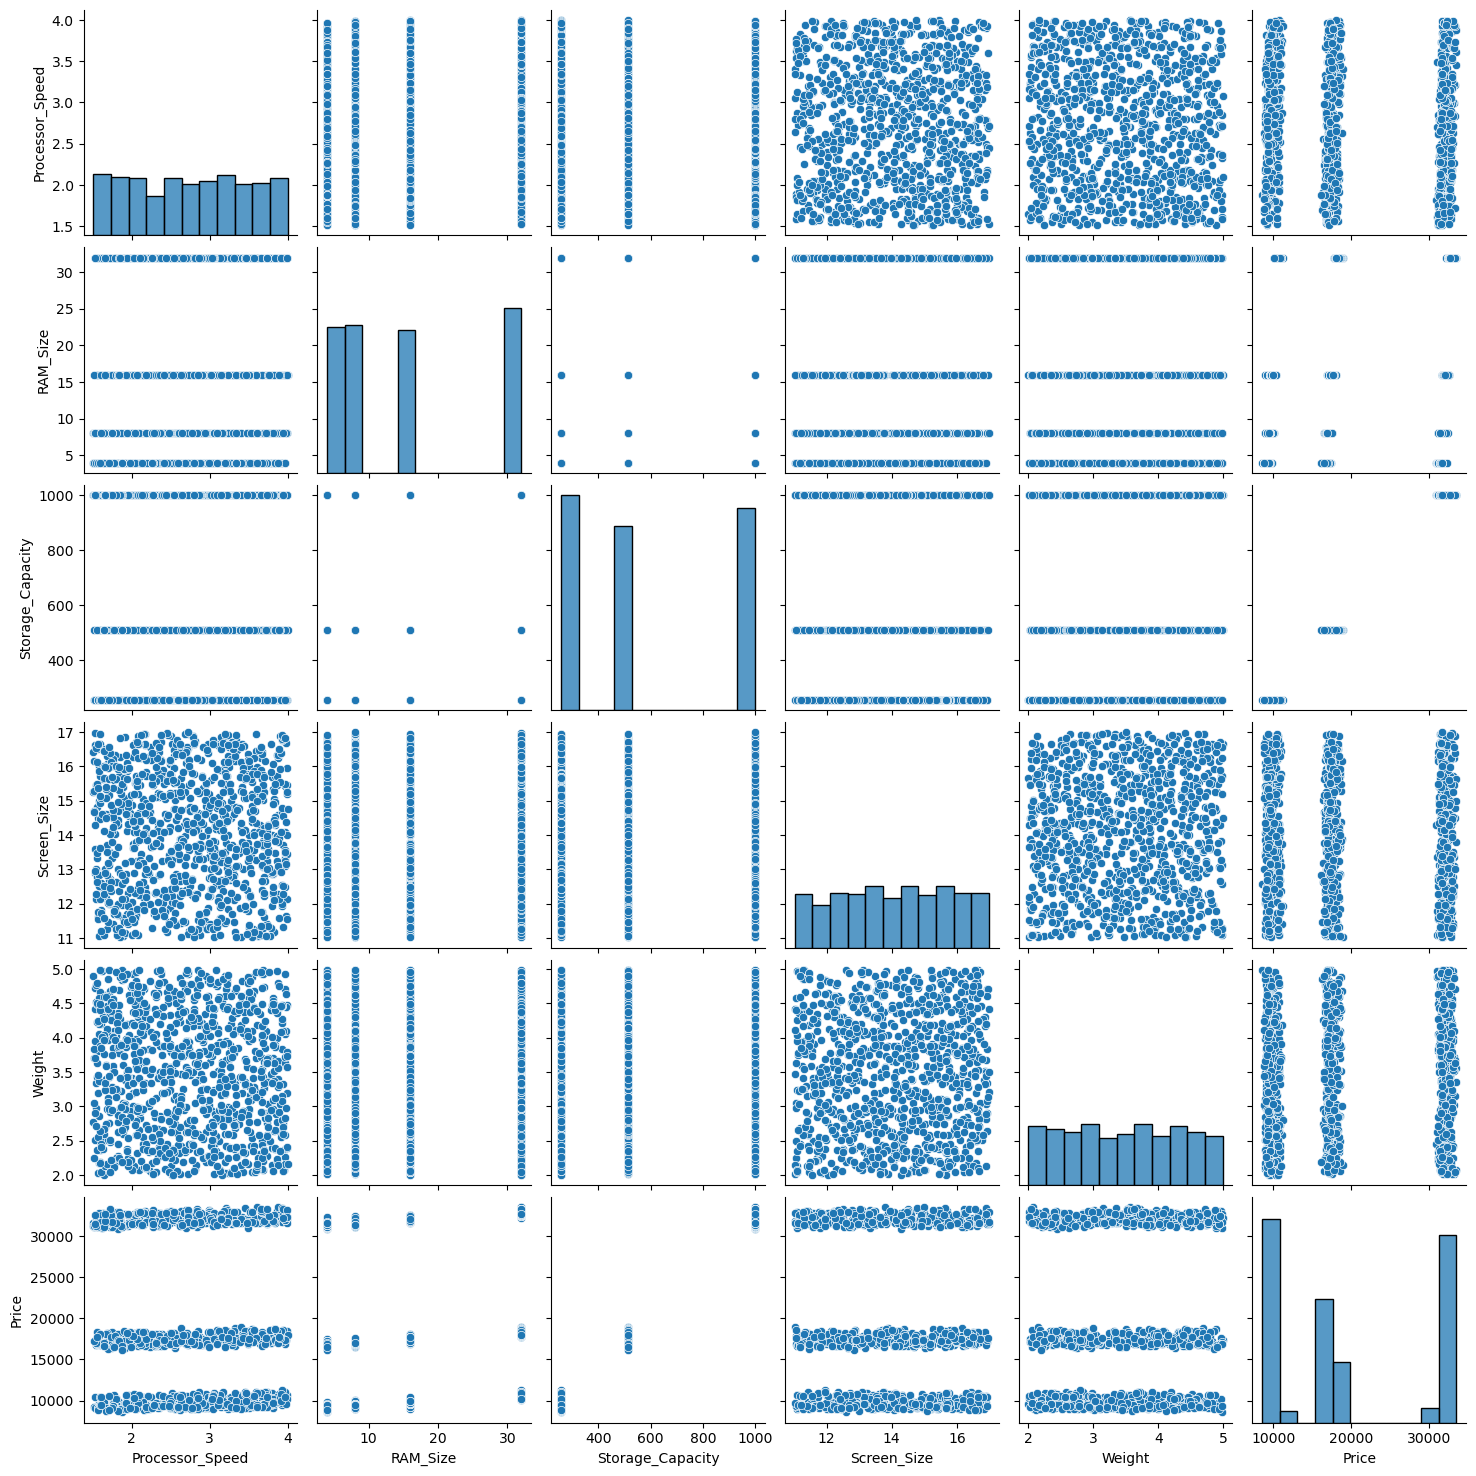

In [7]:
sns.pairplot(df)

In [8]:
# Замена NAN значений на среднее (в нашем случае NAN нет)
df = df.fillna(df.mean(numeric_only=True))

In [9]:
# Убрать дупликаты 
df = df.drop_duplicates()

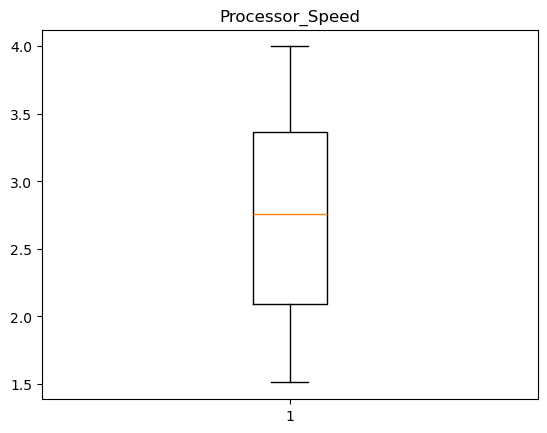

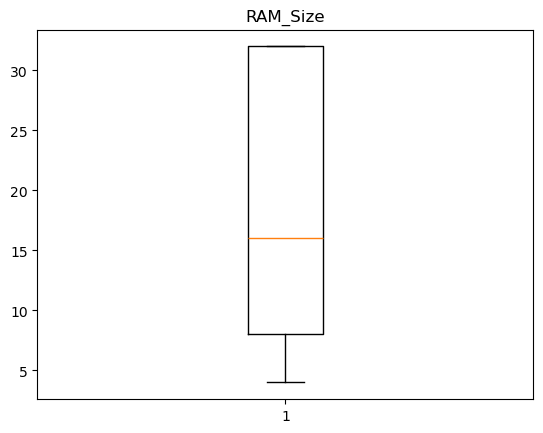

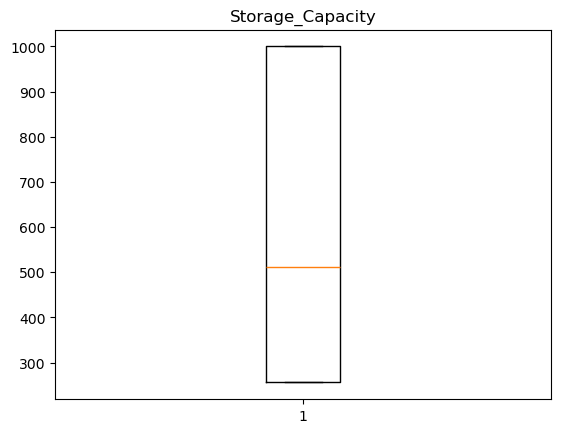

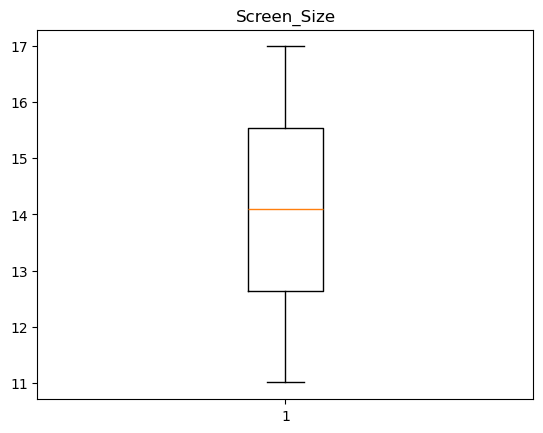

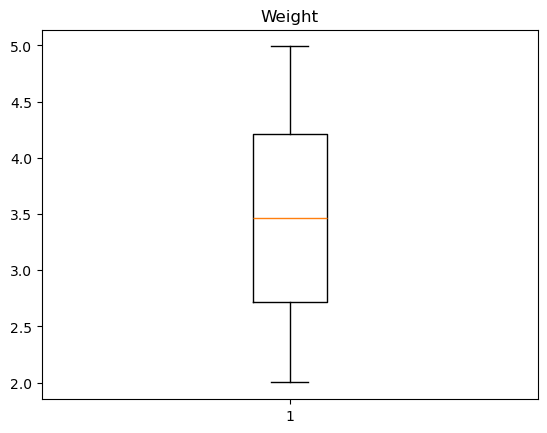

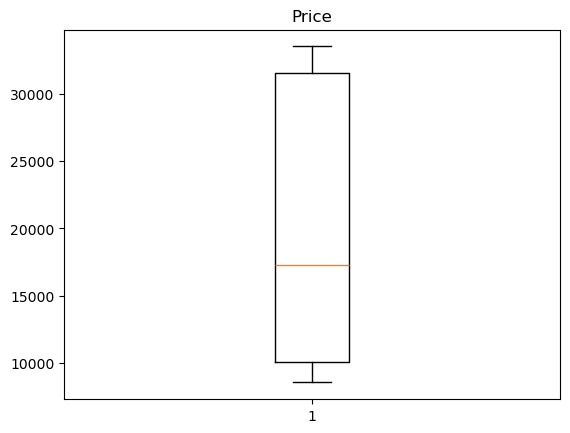

In [10]:
# Проверить выборсы 
for dc in num_cols:
    plt.title(dc)
    plt.boxplot(x=df[dc])
    plt.show()


In [11]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
